<a href="https://colab.research.google.com/github/BenEliasMartin/ZeroToHeroSeries/blob/main/Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zero to Hero Playlist by Andrej Karpathy

Chapter 1: [The spelled-out intro to neural networks and backpropagation: building micrograd](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ)

In [ ]:
 import math
 import numpy as np
 import matplotlib.pyplot as plt
 %matplotlib inline

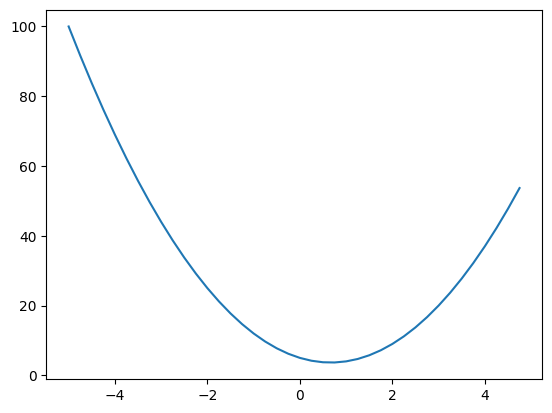

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [ ]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

c+= h
d2 = a*b + c
print('d1', d)
print('d2', d2)
print('slope', (d2 - d)/h)

4.0
d1 4.0
d2 4.0001
slope 0.9999999999976694


In [216]:
class Value:
  def __init__(self, data, _children = (), _op='', label = ''):
    self.data = data
    self._prev = set(_children)
    self.grad = 0.0
    self._op = _op
    self.label = label
    self._backward = lambda: None
  def __repr__(self):
    return f"Value(data={self.data})"
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+', label = f"{self.label} {self._op} {other.label} ");
    def backward():
      self.grad += out.grad
      other.grad += out.grad
    out._backward = backward
    return out
  def __truediv__(self, other):
    return self * other**-1


  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*', label = f"{self.label} {self._op} {other.label} ")
    def backward():
      self.grad += out.grad * other.data
      other.grad += out.grad * self.data
    out._backward = backward
    return out
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp') #e^x

    def backward():
      self.grad += out.grad  * out.data

    out._backward = backward
    return out


  def __rmul__(self, other):
    return self * other
  def __radd__(self, other):
    return self + other
  def __rsub__(self, other):
    return Value(other) - self #other - self

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self, ), f'**{other}', label = f"{self.label} {self._op} {other} ")

    def backward():
      self.grad += out.grad * other * self.data**(other - 1)


    out._backward = backward
    return out
  def __neg__(self):
    return self * -1
  def __sub__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    return self + (-other)
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self,) , 'tanh')
    def backward():
      self.grad += (1 - t**2) * out.grad;

    out._backward = backward
    return out
  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [217]:
a = Value(2.0)
b = Value(4.0)
a - b

Value(data=-2.0)

In [219]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


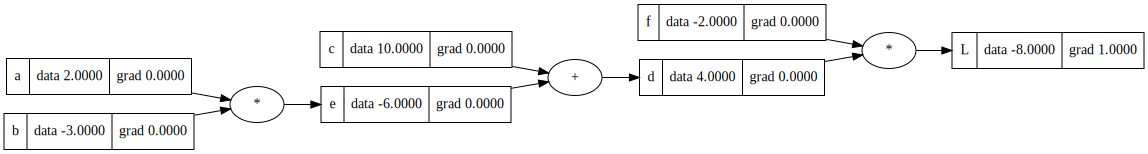

In [ ]:
draw_dot(L)

In [ ]:
L.grad = 1.0

In [ ]:
def lol():
  h = 0.001
  a = Value(2.0, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e';
  d = e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data;

  a = Value(2.0 + h, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  e = a*b; e.label = 'e';
  d = e + c; d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data;
  print((L2 - L1)/h);

lol();

6.000000000000227


In [ ]:
#single neuron with weights w1, w2 and inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
#bias of the neuron
b = Value(6.88137, label = 'b')
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'

e = (2*n).exp()
o = (e - 1) / (e + 1);
o.label = 'o'
o.backward();

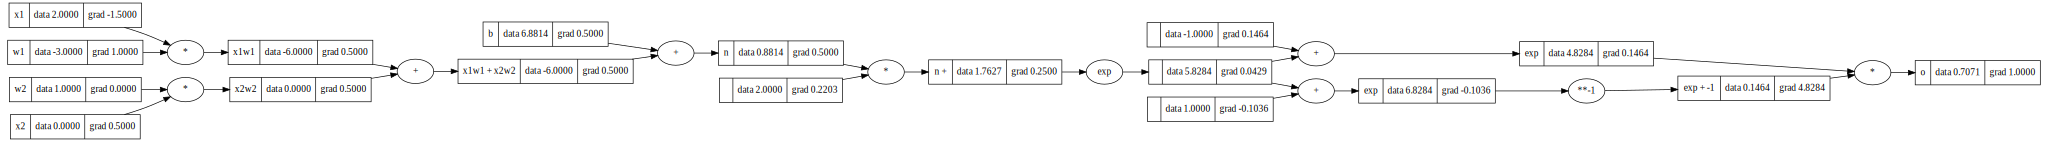

In [ ]:
#DFS based topological sort on the graph starting at the output node,
#only works on DAGs, but given in task graphs
draw_dot(o)

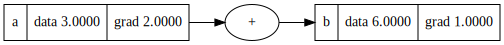

In [ ]:
#bugfix with things like f(x) = x + x
a = Value(3.0, label = "a")
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

In [ ]:
import torch

In [ ]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())


0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [221]:
import random

In [263]:
class Neuron:
  def __init__(self, nIn):
    self.w = [Value(random.uniform(-1, 1)) for _ in range(nIn)]
    self.b = Value(random.uniform(-1, 1))
  def __call__(self, x):
    # calculate w * x + b
    act = sum((xi * wi for xi, wi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  def parameters(self):
    return self.w + [self.b]

class Layer:
  def __init__(self, nIn, nOut):
    self.neurons = [Neuron(nIn) for _ in range(nOut)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  def parameters(self):
    params = []
    for neuron in self.neurons:
      ps = neuron.parameters();
      params.extend(ps);
    return params

class MLP:
  def __init__(self, nin, nout):
    sz = [nin] + nout #list with n inputs, nout is list with outputs per level
    self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nout))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    params = []
    for layer in self.layers:
      ps = layer.parameters()
      params.extend(ps)
    return params

In [317]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.7245776362829403)

In [318]:
#Creating a very small dataset with 4 example inputs, essentially binary classifier that either outputs 1 or -1 is the goal
xs = [
    [2.0,  3.0, -1.0],
    [3.0, -1.0,  0.5],
    [0.5,  1.0,  1.0],
    [1.0,  1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]  # desired outputs

ypred = [n(x) for x in xs]
ypred

[Value(data=-0.7245776362829403),
 Value(data=-0.6502645083277393),
 Value(data=-0.6386773490856358),
 Value(data=-0.7286372316880569)]

In [321]:
#gradient descent
# reset all gradients to zero
for k in range(20):

  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yi - predi)**2 for yi, predi in zip(ys, ypred))

  # backward pass
  for p in n.parameters():
    p.grad = 0.0 #need to reset since otherwise backwards accumalates => huge step size
  loss.backward()

  # update
  for p in n.parameters():
    p.data += -0.05 * p.grad #step size 0.05

  print(k, loss.data)

0 0.030914671915043716
1 0.029557294317324293
2 0.028309252005525438
3 0.027158055569826155
4 0.026093031697632166
5 0.025105006466536326
6 0.02418605242276558
7 0.023329284988046137
8 0.022528697356541578
9 0.021779025676062005
10 0.021075638243469436
11 0.02041444388188114
12 0.019791815745101457
13 0.019204527609912873
14 0.01864970033855087
15 0.018124756671523776
16 0.017627382880923703
17 0.017155496102853315
18 0.016707216394013406
19 0.01628084273632182
